<a href="https://colab.research.google.com/github/nannib/AI/blob/master/discr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Google Colab with GitHub



Accuracy Train: 97.62 % Accuracy Test:  77.78 %
Predicted target name: ['yes']  
 ['age', 'breed', 'past_crimes', 'suspect']  
   [15, 1, 2]     ['yes']


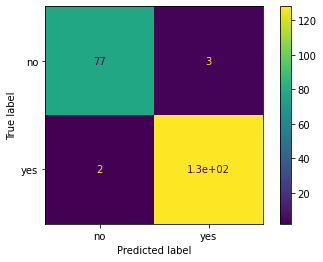

              precision    recall  f1-score   support

          no       0.97      0.96      0.97        80
         yes       0.98      0.98      0.98       130

    accuracy                           0.98       210
   macro avg       0.98      0.97      0.97       210
weighted avg       0.98      0.98      0.98       210



In [ ]:
# -*- coding: utf-8 -*-
"""
This machine learning program works on a dataset forged with discrimination parameters, such the breed and the number of crimes committed in the past of the subject.
If the subject is less the 21 years old or has committed more then 2 crimes in the past and he is Martian (breed=1), the algorithm will classify him as a 'suspect'.
Otherwise, if the subject is Terrestrial (breed=0) and he has committed more then 5 crimes in the past, he will be classified as 'suspect', so Terrestrials are not influenced by the age and they need a crime edge higher then Martians, to be considered 'suspects'.
The dataset is influenced by the attributes of age and breed
@author: Nanni Bassetti - nannibassetti.com 
"""


from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
url = "db.csv"
names = ["age","breed","past_crimes","suspect"]
"""
Age
age of the subject

breed
0 - Terrestrial 
1 - Martian

past_crimes
number of crimes committed in the past


"""
df = pd.read_csv(url, names=names,header=0)
# Split-out validation dataset
df= pd.DataFrame(df)
array = df.values

#print (array[:,0:2])
#print(dataset.head(1000))
#sc = StandardScaler()
#sc = MinMaxScaler()
#X = sc.fit_transform(array[:,0:3])
#X = array[:,0:3]
X = df[['age','breed','past_crimes']]
#print (X)
#y = array[:,3]
y = df['suspect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = SVC(gamma='auto')
#model = KNeighborsClassifier(n_neighbors=3)
#model = Perceptron(max_iter=60, tol=0.001, eta0=0.3, random_state=0)
#model = MLPClassifier(hidden_layer_sizes=[100,50,20],verbose=2, max_iter=294, random_state=0)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
acctest=accuracy_score(y_test,pred_test)
acctrain=accuracy_score(y_train,pred_train)
valori=[15,1,2]
prediction = model.predict([valori])

print("Accuracy Train:",round(acctrain*100,2),"% Accuracy Test: ",round(acctest*100,2),"%")
print("Predicted target name: {}".format(prediction)," \n",names," \n"," ",valori,"   ",prediction)
plot_confusion_matrix(model, X_train, y_train) 
plt.show() 
print(classification_report(y_train,pred_train))



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


[Google Colaboratory](http://colab.research.google.com) is designed to integrate cleanly with GitHub, allowing both loading notebooks from github and saving notebooks to github.

## Loading Public Notebooks Directly from GitHub

Colab can load public github notebooks directly, with no required authorization step.

For example, consider the notebook at this address: https://github.com/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

The direct colab link to this notebook is: https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb.

To generate such links in one click, you can use the [Open in Colab](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo) Chrome extension.

## Browsing GitHub Repositories from Colab

Colab also supports special URLs that link directly to a GitHub browser for any user/organization, repository, or branch. For example:

- http://colab.research.google.com/github will give you a general github browser, where you can search for any github organization or username.
- http://colab.research.google.com/github/googlecolab/ will open the repository browser for the ``googlecolab`` organization. Replace ``googlecolab`` with any other github org or user to see their repositories.
- http://colab.research.google.com/github/googlecolab/colabtools/ will let you browse the main branch of the ``colabtools`` repository within the ``googlecolab`` organization. Substitute any user/org and repository to see its contents.
- http://colab.research.google.com/github/googlecolab/colabtools/blob/master will let you browse ``master`` branch of the ``colabtools`` repository within the ``googlecolab`` organization. (don't forget the ``blob`` here!) You can specify any valid branch for any valid repository.

## Loading Private Notebooks

Loading a notebook from a private GitHub repository is possible, but requires an additional step to allow Colab to access your files.
Do the following:

1. Navigate to http://colab.research.google.com/github.
2. Click the "Include Private Repos" checkbox.
3. In the popup window, sign-in to your Github account and authorize Colab to read the private files.
4. Your private repositories and notebooks will now be available via the github navigation pane.

## Saving Notebooks To GitHub or Drive

Any time you open a GitHub hosted notebook in Colab, it opens a new editable view of the notebook. You can run and modify the notebook without worrying about overwriting the source.

If you would like to save your changes from within Colab, you can use the File menu to save the modified notebook either to Google Drive or back to GitHub. Choose **File→Save a copy in Drive** or **File→Save a copy to GitHub** and follow the resulting prompts. To save a Colab notebook to GitHub requires giving Colab permission to push the commit to your repository.

## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.